In [26]:
# Importing the necessary libraries
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader
from torch import nn

### Loading the Training and Testing Data

In [5]:
# Loading the train data
train_data = datasets.MNIST(train=True,
                            transform=ToTensor(),
                            root="data",
                            download=True,
                            target_transform=None)

test_data = datasets.MNIST(train=False,
                           target_transform=None,
                           transform=ToTensor(),
                           root="data",
                           download=True)

In [7]:
# Checking the lengths of training and testing data
len(train_data), len(test_data)

(60000, 10000)

In [10]:
# Seeing a random training example
import random
from random import seed

seed(42)
rand_index = random.randint(1, len(train_data))

image, label = train_data[rand_index]
rand_index, image, label

(41906,
 tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 

In [11]:
# Printing out the various classes present inside the MNIST dataset
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [20]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

(-0.5, 27.5, 27.5, -0.5)

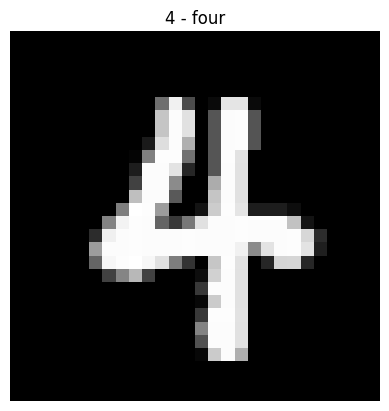

In [19]:
# Visualizing a few random images

plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

In [21]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

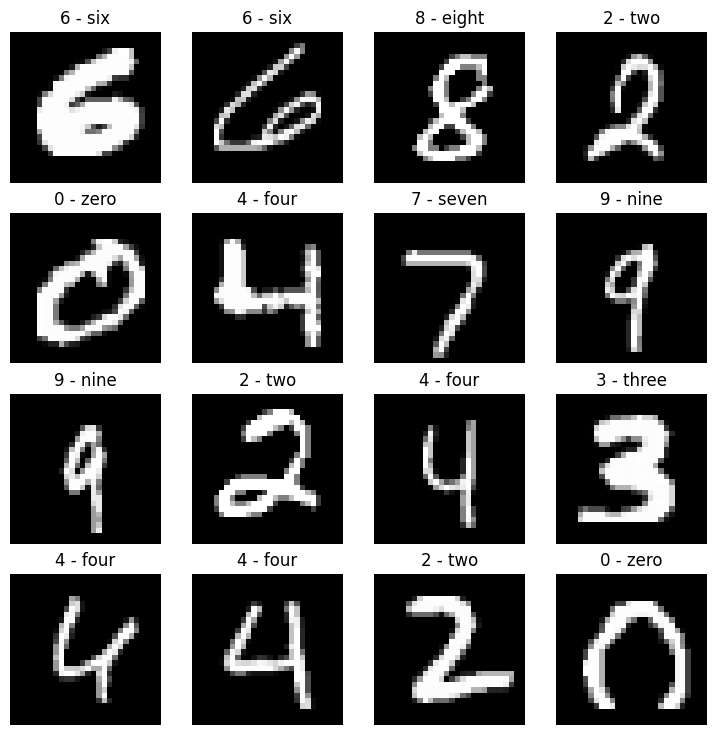

In [22]:
# Plot more random images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

In [23]:
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [27]:
# Turning the train and test data into dataloaders
SEED = 42
torch.manual_seed(SEED)
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x7f9854d7ead0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f9854e7da80>)

In [28]:
# Let's check the number of batches in each of the dataloaders
print(f"Length of train dataloader: {len(train_dataloader)} of {BATCH_SIZE} batches...")
print(f"Length of test dataloader: {len(test_dataloader)} of {BATCH_SIZE} batches...")

Length of train dataloader: 1875 of 32 batches...
Length of test dataloader: 313 of 32 batches...


In [29]:
train_features_batch,  train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image Size: torch.Size([1, 28, 28])
Label Size: torch.Size([])


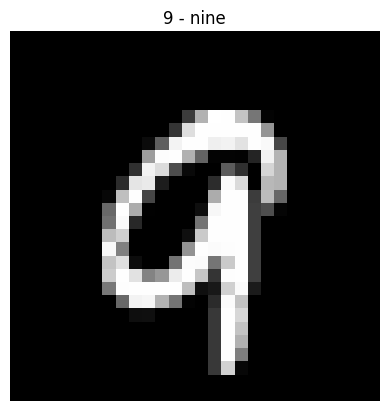

In [30]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()

img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

print(f"Image Size: {img.shape}")
print(f"Label Size: {label.shape}")

### Making a Simple CNN (TinyVGG) to fit our MNIST dataset

In [ ]:
class MNISTModel(nn.Module):
    def __init__(self, 
                 input_shape: int,
                 hidden_units: int, 
                 output_shape: int):
        super().__init__()
        self.conv_block_1= nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                        out_channels=hidden_units,
                        kernel_size=3,
                        stride=1,
                        padding=1),

            nn.ReLU()

            nn.Conv2d()
        )